Let's start off by importing a few functions from `Reg_class` to initalize the Franke function

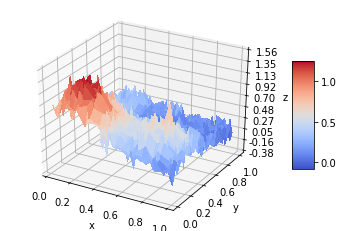

In [16]:
from Reg_class import FrankeFunction, plotter
import numpy as np, matplotlib.pyplot as plt
n = 40
x = np.sort(np.random.rand(n))
y = np.sort(np.random.rand(n))
x, y = np.meshgrid(x, y)

noise = 0.1*np.random.randn(n, n)
z = FrankeFunction(x, y) + noise
plotter(x, y, z)

x, y, z = x.ravel(), y.ravel(), z.ravel()

Now that we have our data, we can perform a standard linear regression to fit a surface by a polynomial of order $p_x = p_y = 5$. 

In [2]:
from Reg_class import Polyfit, DesignMatrix
px, py = 5, 5
X = DesignMatrix(x, y, px, py)
reg = Polyfit()

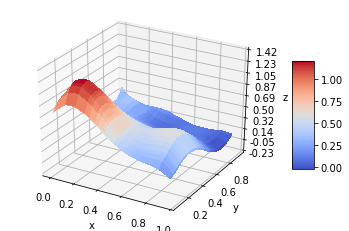

In [3]:
OLS_beta, OLS_fit = reg.fit(X, z, model='OLS')
plotter(x.reshape(n, n), y.reshape(n, n), OLS_fit.reshape(n, n))

## exercise a)

In [4]:
print (reg.R2(), reg.MSE())

0.8606885105550324 0.010251878749366223


Confidence intervals dont work yet.. size of interval is up to ~40 times the size of the coefficient.

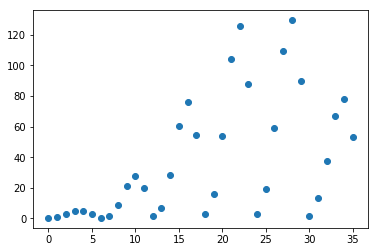

In [5]:
b_var = reg.beta_variance()
conf_int = 2*1.96*np.sqrt(b_var)
c_int_frac = np.abs(OLS_beta)/conf_int
plt.scatter(np.arange(36), c_int_frac)


## exercise b)

In [6]:
from Reg_class import train_test_split, kfold_split
X_train, z_train, X_test, z_test= train_test_split(X, z)
print (z_train.shape, X_train.shape, z_test.shape, X_test.shape)

(1200,) (1200, 36) (400,) (400, 36)


In [7]:
k = 5
M, R = reg.kfold_xval(X_train, z_train, k)
for i in range(k):
    print (M[i], R[i])

0.05124097292077378 0.2959962228148435
0.020252217867578203 0.7093102823986832
0.13715189789763588 -0.8028100470076542
0.07291363282066489 0.08884577086948228
0.027853359508716452 0.5827878897663685


## exercise c)

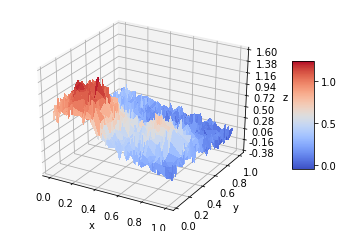

In [20]:
n = 50
x = np.sort(np.random.rand(n))
y = np.sort(np.random.rand(n))
x, y = np.meshgrid(x, y)

noise = 0.1*np.random.randn(n, n)
z = FrankeFunction(x, y) + noise
plotter(x, y, z)

x, y, z = x.ravel(), y.ravel(), z.ravel()

reg = Polyfit()

In [33]:
pmax = 15
bias = np.zeros(pmax)
var = bias.copy()
error = bias.copy()
for px, py in zip(range(pmax+1)[1:], range(pmax+1)[1:]):
    print (px)
    X = DesignMatrix(x, y, px, py)
    reg.fit(X, z, model='OLS')
    bias[px-1] = reg.bias()
    var[px-1] = reg.variance()
    error[px-1] = reg.MSE()
    

    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


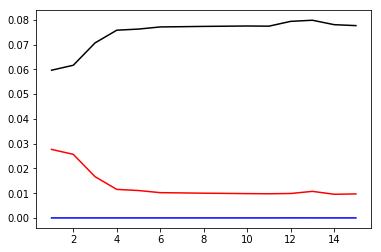

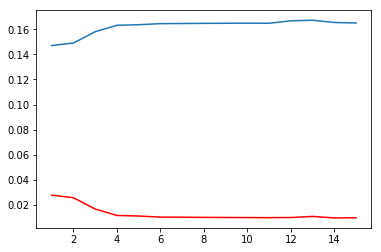

In [36]:
p = np.arange(pmax+1)[1:]
plt.plot(p, error, color='r')
plt.plot(p, bias**2, color='b')
plt.plot(p, var, color='k')

plt.show()
    
plt.plot(p, error, color='r')
plt.plot(p, bias**2 + var + reg.sigma2())
plt.show()